In [1]:
from pyforest import *
lazy_imports()

['import re',
 'import altair as alt',
 'from statsmodels.tsa.arima_model import ARIMA',
 'import pandas as pd',
 'from sklearn.model_selection import GridSearchCV',
 'import awswrangler as wr',
 'from sklearn.ensemble import RandomForestClassifier',
 'from PIL import Image',
 'from pathlib import Path',
 'import keras',
 'from sklearn.linear_model import ElasticNet',
 'from sklearn import svm',
 'from sklearn.linear_model import LogisticRegression',
 'import pickle',
 'import nltk',
 'from sklearn.cluster import KMeans',
 'from sklearn.model_selection import KFold',
 'from sklearn.linear_model import RidgeCV',
 'import textblob',
 'import lightgbm as lgb',
 'import os',
 'from sklearn.preprocessing import LabelEncoder',
 'from sklearn.ensemble import RandomForestRegressor',
 'import torch',
 'import skimage',
 'from sklearn.ensemble import GradientBoostingRegressor',
 'from fbprophet import Prophet',
 'from sklearn.linear_model import LassoCV',
 'from sklearn.linear_model import Linea

In [2]:
columns = ['Pregnancies', 'Plasma', 'Blood Pressure', 'Skin', 'Insulin test', 'Body Mass', 'Pedigree', 'Age', 'Class']
raw_data = pd.read_csv('../dataset/diabetes.csv', names=columns, header=None)

<IPython.core.display.Javascript object>

In [3]:
raw_data.head()

,Pregnancies,Plasma,Blood Pressure,Skin,Insulin test,Body Mass,Pedigree,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
raw_data.shape

(768, 9)

In [5]:
raw_data.isna().sum()

Pregnancies       0
Plasma            0
Blood Pressure    0
Skin              0
Insulin test      0
Body Mass         0
Pedigree          0
Age               0
Class             0
dtype: int64

In [6]:
raw_data.describe()

,Pregnancies,Plasma,Blood Pressure,Skin,Insulin test,Body Mass,Pedigree,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
raw_data.dtypes

Pregnancies         int64
Plasma              int64
Blood Pressure      int64
Skin                int64
Insulin test        int64
Body Mass         float64
Pedigree          float64
Age                 int64
Class               int64
dtype: object

In [8]:
df = raw_data.copy()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

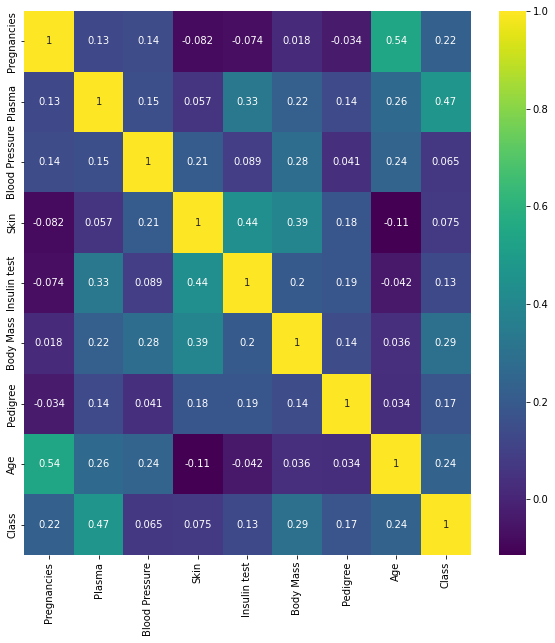

In [9]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

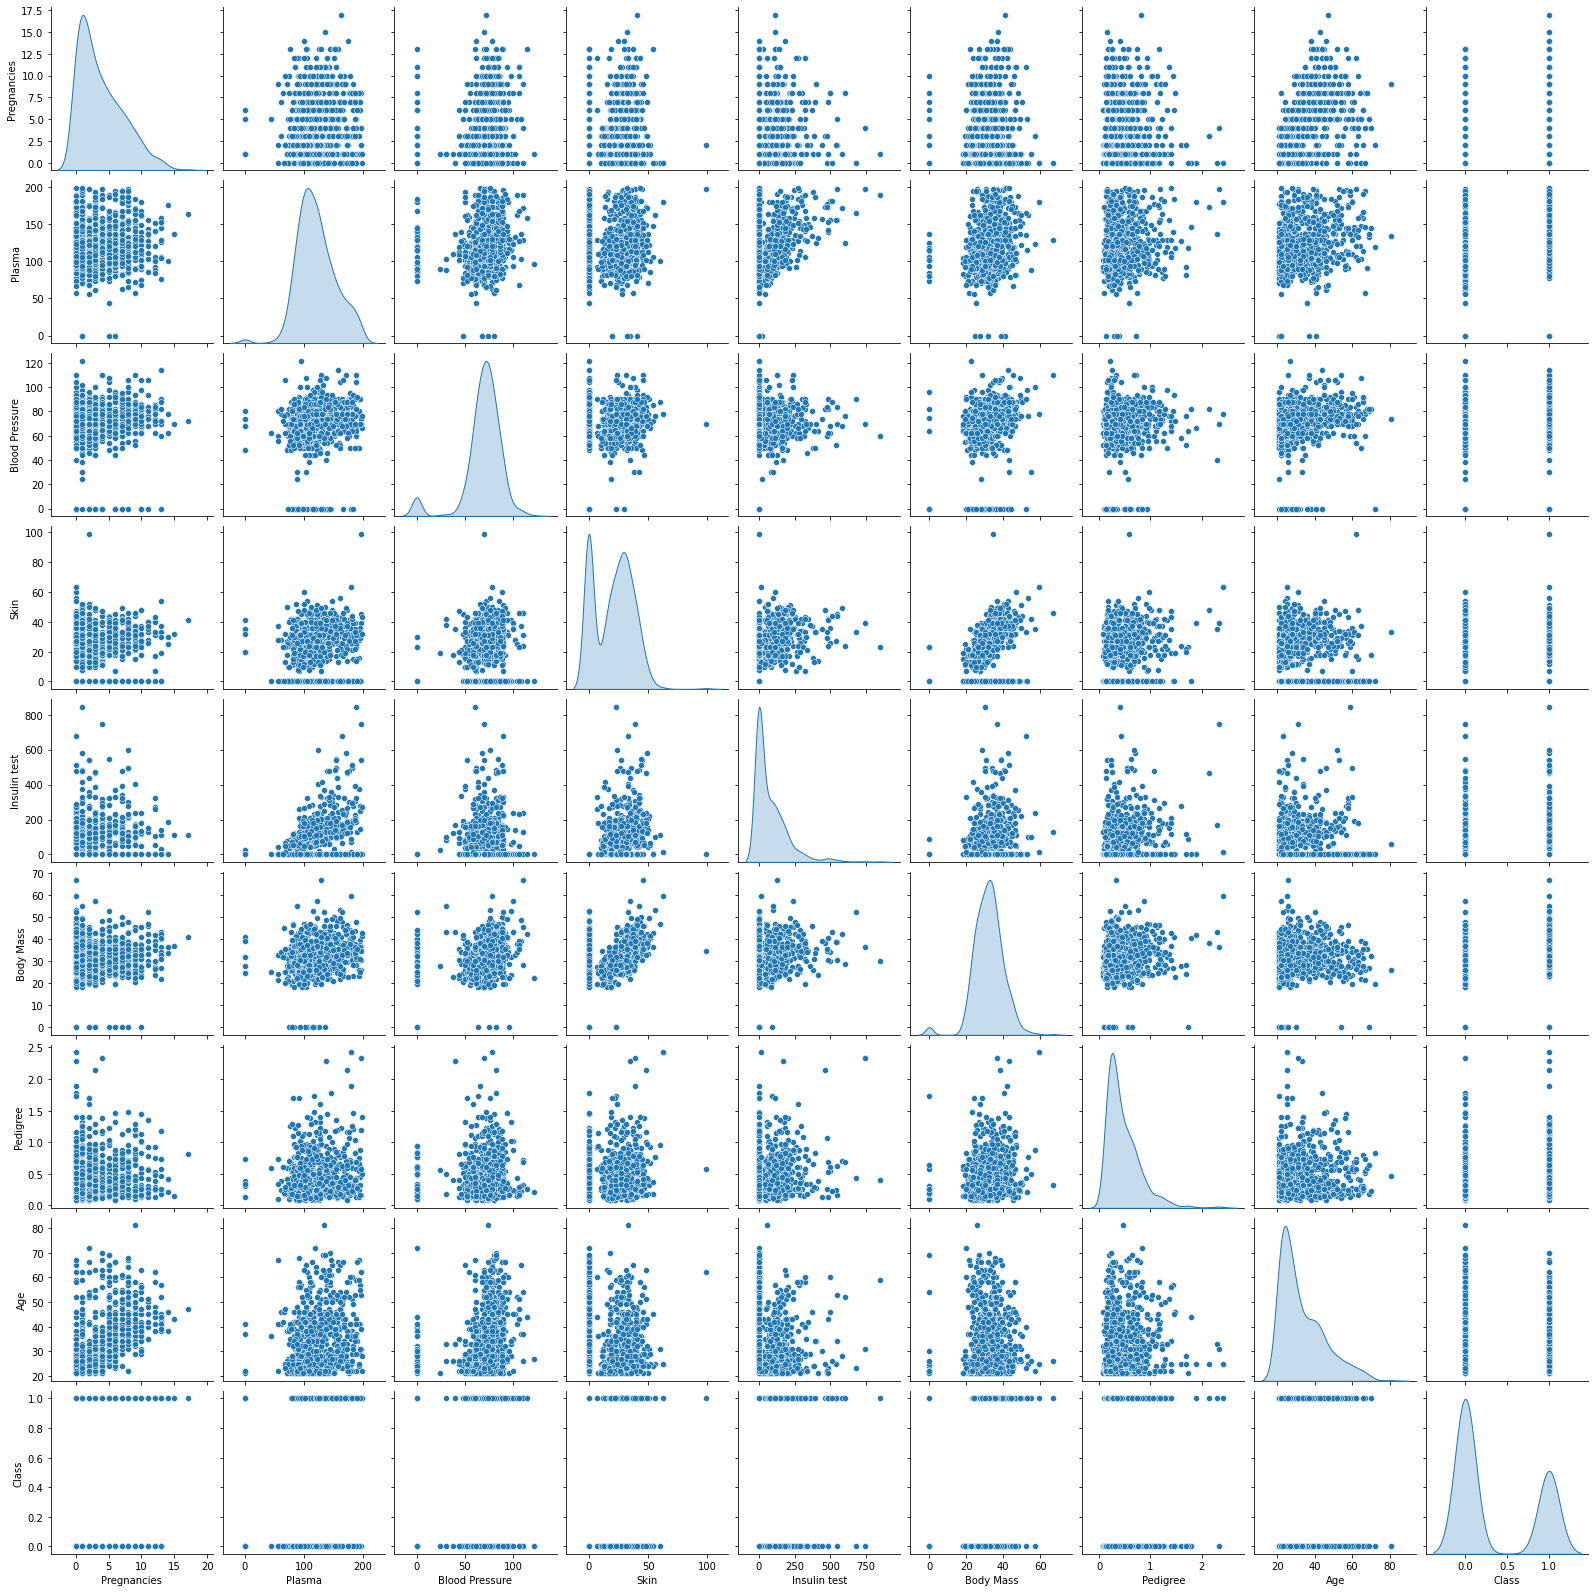

In [10]:
sns.pairplot(df, diag_kind='kde')
plt.show()

In [12]:
df['Class'].value_counts()

0    500
1    268
Name: Class, dtype: int64

In [13]:
x = df.drop('Class', axis=1)
y = df['Class']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=42)

<IPython.core.display.Javascript object>

In [14]:
print((len(xtrain)/len(df))*100)
print((len(xtest)/len(df))*100)

69.921875
30.078125


In [15]:
xtrain.head()

,Pregnancies,Plasma,Blood Pressure,Skin,Insulin test,Body Mass,Pedigree,Age
334,1,95,60,18,58,23.9,0.260,22
139,5,105,72,29,325,36.9,0.159,28
485,0,135,68,42,250,42.3,0.365,24
547,4,131,68,21,166,33.1,0.160,28
18,1,103,30,38,83,43.3,0.183,33


In [16]:
replace = SimpleImputer(missing_values=0, strategy='mean')
cols = xtrain.columns
xtrain = pd.DataFrame(replace.fit_transform(xtrain))
xtest = pd.DataFrame(replace.fit_transform(xtest))

xtrain.columns = cols
xtest.columns = cols

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [17]:
xtrain.head()

,Pregnancies,Plasma,Blood Pressure,Skin,Insulin test,Body Mass,Pedigree,Age
0,1.000000,95.0,60.0,18.0,58.0,23.9,0.260,22.0
1,5.000000,105.0,72.0,29.0,325.0,36.9,0.159,28.0
2,4.340564,135.0,68.0,42.0,250.0,42.3,0.365,24.0
3,4.000000,131.0,68.0,21.0,166.0,33.1,0.160,28.0
4,1.000000,103.0,30.0,38.0,83.0,43.3,0.183,33.0


In [18]:
model = LogisticRegression(solver='liblinear')
model.fit(xtrain, ytrain)

<IPython.core.display.Javascript object>

LogisticRegression(solver='liblinear')

In [19]:
ypred = model.predict(xtest)
ypred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

<IPython.core.display.Javascript object>

[[ 46  34]
 [ 23 128]]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

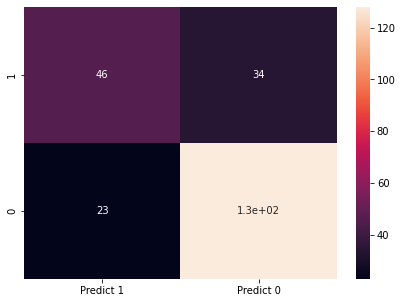

In [29]:
cm = metrics.confusion_matrix(ytest, ypred, labels=[1, 0])
print(cm)
df_cm = pd.DataFrame(cm, index=[1, 0],
                    columns=['Predict 1', 'Predict 0'])
plt.figure(figsize=(7, 5))
sns.heatmap(df_cm, annot=True)
plt.show()

In [25]:
model.score(xtrain, ytrain)

0.7746741154562383

In [26]:
model.score(xtest, ytest)

0.7532467532467533